In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import sklearn
import pandas as pd
import numpy as np
np.random.seed(120)

In [3]:
train_df = pd.read_csv("./Data/processed/train.csv", sep = "|")
test_df = pd.read_csv("./Data/processed/test.csv", sep = "|")

In [23]:
import seaborn as sns

<AxesSubplot:xlabel='sentiments', ylabel='count'>

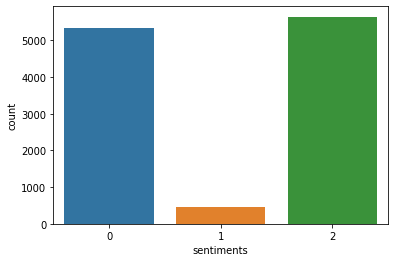

In [24]:
sns.countplot(x = 'sentiments', data = train_df)

In [6]:
train_df

,sentences,sentiments
0,slide giáo_trình đầy_đủ,2
1,nhiệt_tình giảng_dạy gần_gũi với sinh_viên,2
2,đi học đầy_đủ full điểm chuyên cần,0
3,chưa áp_dụng công_nghệ_thông_tin và các thiết_...,0
4,thầy giảng bài hay có nhiều bài_tập ví_dụ ngay...,2
...,...,...
11421,chỉ vì môn game mà em học hai lần mà không qua...,0
11422,em cảm_ơn cô nhiều,2
11423,giao bài_tập quá nhiều,0
11424,giáo_viên dạy dễ hiểu nhiệt_tình,2


In [7]:
train_sentences = list(train_df['sentences'].values)
test_sentences  = test_df['sentences'].values

train_sentences
test_sentences

array(['giáo_trình chưa cụ_thể', 'giảng buồn_ngủ',
       'giáo_viên vui_tính tận_tâm', ...,
       'thầy không dạy nhiều chủ_yếu cho sinh_viên tự tìm_hiểu',
       'em muốn đổi tên môn_học vì tên môn là lập_trình c fraction cplusplus nhưng lại học thiên về csharp',
       'thầy vừa dạy vừa chat hoặc gọi điện_thoại thường_xuyên'],
      dtype=object)

In [8]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))

train_vectors = tfidf_vectorizer.fit_transform(train_sentences)


In [9]:
x_train = train_vectors
y_train = train_df['sentiments'].values

x_test = tfidf_vectorizer.transform(test_sentences)
y_test = test_df['sentiments'].values

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix

weights = [{0:1, 1: 1, 2:1}, {0:1, 1:5, 2:1}, {0:1, 1:10, 2:1}]
# param_grid = {'C': [0.1, 1, 10],
#               'gamma': [ 1],
#               'kernel': ['linear', 'rbf'],
#              'class_weight': weights}



param_grid = {'C': [1],
              'gamma': [ 1, 0.1, 0.01],
              'kernel': ['linear','rbf'],
             'class_weight': [{0:1, 1:5, 2:1}]}


svm_classifier = SVC(probability =True)

svm_grid = GridSearchCV(svm_classifier, param_grid, cv = 5, verbose = 3
                        , scoring='f1_weighted')

In [11]:
from sklearn import svm
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear')

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       705
           1       0.83      0.14      0.24        73
           2       0.93      0.94      0.93       805

    accuracy                           0.91      1583
   macro avg       0.88      0.68      0.70      1583
weighted avg       0.91      0.91      0.90      1583



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


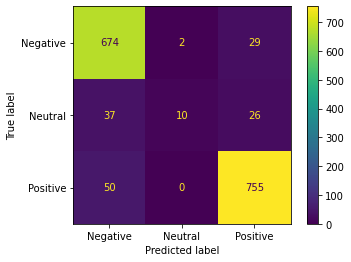

In [12]:
from sklearn.metrics import plot_confusion_matrix

test_predictions = classifier_linear.predict(x_test)
print(classification_report(y_test, test_predictions))
plot_confusion_matrix(classifier_linear,x_test,y_test, display_labels = ['Negative', 'Neutral', 'Positive'])

In [13]:
svm_grid.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=linear;, score=0.897 total time=  13.7s
[CV 2/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=linear;, score=0.893 total time=  13.5s
[CV 3/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=linear;, score=0.893 total time=  13.8s
[CV 4/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=linear;, score=0.898 total time=  13.3s
[CV 5/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=linear;, score=0.882 total time=  12.7s
[CV 1/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=rbf;, score=0.907 total time=  21.3s
[CV 2/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=rbf;, score=0.901 total time=  21.8s
[CV 3/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=rbf;, score=0.914 total time=  22.9s
[CV 4/5] END C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, kernel=rbf;, score=0.910 total ti

GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [1], 'class_weight': [{0: 1, 1: 5, 2: 1}],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['linear', 'rbf']},
             scoring='f1_weighted', verbose=3)

In [14]:
print(svm_grid.best_params_)

{'C': 1, 'class_weight': {0: 1, 1: 5, 2: 1}, 'gamma': 1, 'kernel': 'rbf'}


In [15]:
print(svm_grid.best_score_)

0.9037847213641417


In [16]:
print(svm_grid.best_estimator_)

SVC(C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, probability=True)


In [17]:
import pickle

# save
with open('svm.pkl','wb') as f:
    pickle.dump(svm_grid,f)


In [18]:
classifier_linear = svm.SVC(C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, probability=True)
classifier_linear.fit(x_train, y_train)

SVC(C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, probability=True)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       705
           1       0.56      0.33      0.41        73
           2       0.95      0.93      0.94       805

    accuracy                           0.92      1583
   macro avg       0.80      0.74      0.76      1583
weighted avg       0.91      0.92      0.91      1583



C:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


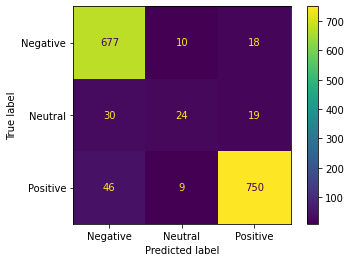

In [19]:
from sklearn.metrics import plot_confusion_matrix

test_predictions = classifier_linear.predict(x_test)
print(classification_report(y_test, test_predictions))
plot_confusion_matrix(classifier_linear,x_test,y_test, display_labels = ['Negative', 'Neutral', 'Positive'])

In [20]:
classifier_linear.predict(x_test)

array([0, 0, 2, ..., 0, 0, 2], dtype=int64)

In [21]:
from random import sample

In [22]:
def end_to_end(List):
#     classifier_linear = svm.SVC(C=1, class_weight={0: 1, 1: 5, 2: 1}, gamma=1, probability=True)
    test = tfidf_vectorizer.transform(sample(List,k = 10))
    test_predictions = list(classifier_linear.predict(test))
    labels = ['Negative','Netural','Positive']
    for i in range(10):
        if(test_predictions[i]==0):
            test_predictions[i] = labels[0]
        if(test_predictions[i]==1):
            test_predictions[i] = labels[1]
        if(test_predictions[i]==2):
            test_predictions[i] = labels[2]
    return test_predictions
end_to_end(list(test_sentences))

['Positive',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Positive']